In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the historical dataset
df_historical = pd.read_csv('..\data\df_historical.csv', index_col='Date', parse_dates=True)

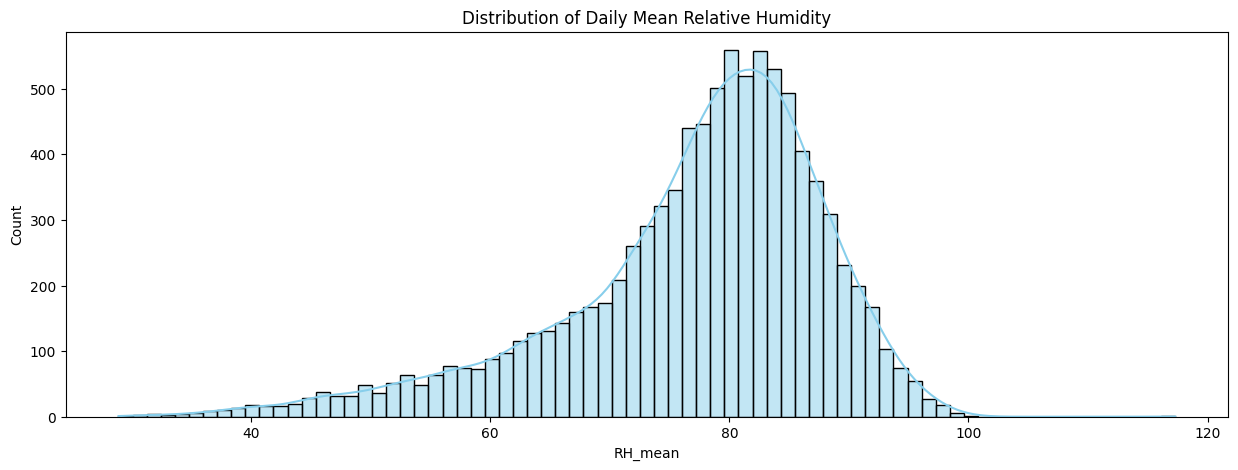

In [3]:
# 1. Plot the distributions of the new RH features
plt.figure(figsize=(15, 5))
sns.histplot(df_historical['RH_mean'], kde=True, color='skyblue')
plt.title('Distribution of Daily Mean Relative Humidity')
plt.show()

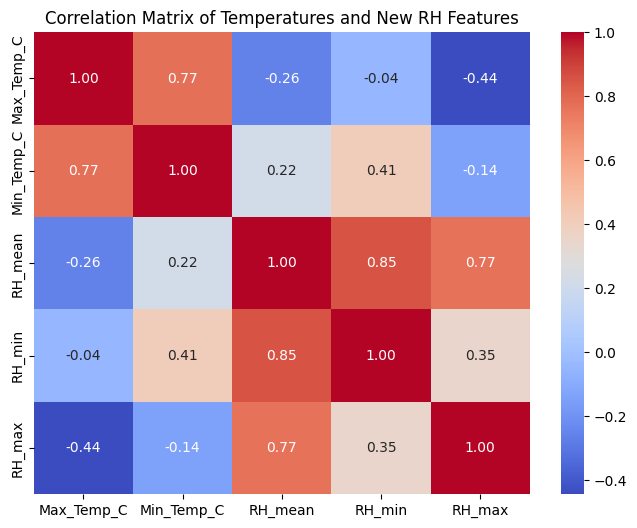

In [7]:
# 2. Check the correlation of new features with our primary targets (Max/Min Temp)
# We are most interested in the new columns
new_rh_cols = ['RH_mean', 'RH_min', 'RH_max']
correlation_matrix = df_historical[['Max_Temp_C', 'Min_Temp_C'] + new_rh_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Temperatures and New RH Features')
plt.savefig('..\images\correlation_matrix_withRH.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Create lagged features for RH
for i in [1, 2, 3, 7]:
    df_historical[f'RH_mean_lag_{i}'] = df_historical['RH_mean'].shift(i)

# Create rolling window features for RH
for window in [3, 7]:
    df_historical[f'RH_mean_rolling_mean_{window}d'] = df_historical['RH_mean'].rolling(window=window).mean()
    df_historical[f'RH_mean_rolling_std_{window}d'] = df_historical['RH_mean'].rolling(window=window).std()

# Clean up any NaNs created by these operations
df_historical.dropna(inplace=True)

In [6]:
df_historical

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,...,RH_min,RH_max,RH_mean_lag_1,RH_mean_lag_2,RH_mean_lag_3,RH_mean_lag_7,RH_mean_rolling_mean_3d,RH_mean_rolling_std_3d,RH_mean_rolling_mean_7d,RH_mean_rolling_std_7d
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-08,0.0,1.0,20.1,0.0,1999,1,8,4,0.500000,0.866025,...,52.30,100.00,87.50000,77.55000,75.90000,77.35000,80.400000,6.188497,77.357143,4.911418
1999-01-09,0.0,2.3,14.8,0.0,1999,1,9,5,0.500000,0.866025,...,61.60,100.00,76.15000,87.50000,77.55000,78.30000,81.483333,5.705772,77.714286,5.079429
1999-01-10,0.0,1.2,17.1,0.0,1999,1,10,6,0.500000,0.866025,...,58.80,100.00,80.80000,76.15000,87.50000,73.40000,78.783333,2.385547,78.571429,4.723863
1999-01-11,0.0,-2.0,20.4,0.0,1999,1,11,0,0.500000,0.866025,...,57.30,100.00,79.40000,80.80000,76.15000,72.70000,79.616667,1.091253,79.421429,3.965776
1999-01-12,0.0,-1.4,21.0,0.0,1999,1,12,1,0.500000,0.866025,...,42.90,100.00,78.65000,79.40000,80.80000,75.90000,76.500000,4.389476,78.785714,4.876450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-13,0.0,14.7,28.0,0.0,2024,10,287,6,-0.866025,0.500000,...,55.92,97.06,79.37250,75.91625,76.83375,84.00500,78.482917,2.257404,79.070357,2.240191
2024-10-14,0.0,17.2,27.5,0.0,2024,10,288,0,-0.866025,0.500000,...,61.80,96.31,80.16000,79.37250,75.91625,82.78000,80.228750,0.892613,78.838036,1.839927
2024-10-15,0.0,15.0,27.5,0.0,2024,10,289,1,-0.866025,0.500000,...,59.49,98.04,81.15375,80.16000,79.37250,79.41250,81.072917,0.875304,79.194107,2.179478
